#  CENSUS INCOME

# Project Description

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

# Description of fnlwgt (final weight)

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

1.	A single cell estimate of the population 16+ for each state.

2.	Controls for Hispanic Origin by age and sex.

3.	Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.


# EXPLORATION OF DATASET:

In [1]:
#Importing necessary libraries for analysis:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#Downloading the raw data and loading into dataframe with the help of pandas library
df=pd.read_csv(r"https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Census%20Income/Census%20Income.csv")

In [3]:
#For viewing the first 5 columns in given dataset
df.head(5)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
#To know about the no of rows and columns in the dataset
df.shape

(32560, 15)

In [5]:
#To know more about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
below_16=[]
for i in df.columns:
    print("Unique Value count of",i,"column:",len(df[i].unique()))
    if (len(df[i].unique())<17):
        below_16.append(i)

Unique Value count of Age column: 73
Unique Value count of Workclass column: 9
Unique Value count of Fnlwgt column: 21647
Unique Value count of Education column: 16
Unique Value count of Education_num column: 16
Unique Value count of Marital_status column: 7
Unique Value count of Occupation column: 15
Unique Value count of Relationship column: 6
Unique Value count of Race column: 5
Unique Value count of Sex column: 2
Unique Value count of Capital_gain column: 119
Unique Value count of Capital_loss column: 92
Unique Value count of Hours_per_week column: 94
Unique Value count of Native_country column: 42
Unique Value count of Income column: 2


In [7]:
cat_col = df.select_dtypes(include=['object']).columns
print("Categorical columns are:",cat_col)
print("\nThe count of categoricdal columns are:",len(cat_col))

Categorical columns are: Index(['Workclass', 'Education', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native_country', 'Income'],
      dtype='object')

The count of categoricdal columns are: 9


In [8]:
num_col = df.select_dtypes(include=['int64','float64']).columns
print("Numerical columns are:",num_col)
print("\nThe count of Numerical Columns are",len(num_col))

Numerical columns are: Index(['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss',
       'Hours_per_week'],
      dtype='object')

The count of Numerical Columns are 6


In [9]:
for i in below_16:
    print("Unique values of these columns:",i,"-",df[i].unique())

Unique values of these columns: Workclass - [' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
Unique values of these columns: Education - [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
Unique values of these columns: Education_num - [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
Unique values of these columns: Marital_status - [' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed']
Unique values of these columns: Occupation - [' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Craft-repair'
 ' Transport-moving' ' Farming-fishing' ' Machine-op-inspct'
 ' Tech-support' ' ?' ' Protective-serv' ' Armed-Forces'
 ' Priv-house-serv']
Unique values of these co

In the unique value section we can see "?" in the dataset.While handling the missing values we have to remove or impute these values for better performance of the model.

OBSERVATION:
    
    From this exploration, We can see that there are 32560  rows and  15 columns.In this 15 columns there are 9 columns with object datatype and 6 columns with the numerical dataype.In this there 9 columns which has 16 distinct values can be classified so these columns comes under categorical column.
   

 We can futher proceed for the futher analysis.

# Identifying the missing values:

In [10]:
#Finding the missing values
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values],axis =1,keys =['Missing Values','% Missing data']))

                Missing Values  % Missing data
Age                          0             0.0
Workclass                    0             0.0
Fnlwgt                       0             0.0
Education                    0             0.0
Education_num                0             0.0
Marital_status               0             0.0
Occupation                   0             0.0
Relationship                 0             0.0
Race                         0             0.0
Sex                          0             0.0
Capital_gain                 0             0.0
Capital_loss                 0             0.0
Hours_per_week               0             0.0
Native_country               0             0.0
Income                       0             0.0


From the unique value section we have noticed that "?" this as the unique value so replacing that with nan and them handling those with imputation.

In [11]:
df.isin([' ?']).sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [12]:
# replace ? with Nan
df=df.replace(' ?',np.nan)

In [13]:
df.isin([' ?']).sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [14]:
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [15]:
df["Workclass"].fillna(df["Workclass"].mode()[0], inplace=True)
df["Native_country"].fillna(df["Native_country"].mode()[0], inplace=True)
df["Occupation"].fillna(df["Occupation"].mode()[0], inplace=True)

In [16]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

<Axes: >

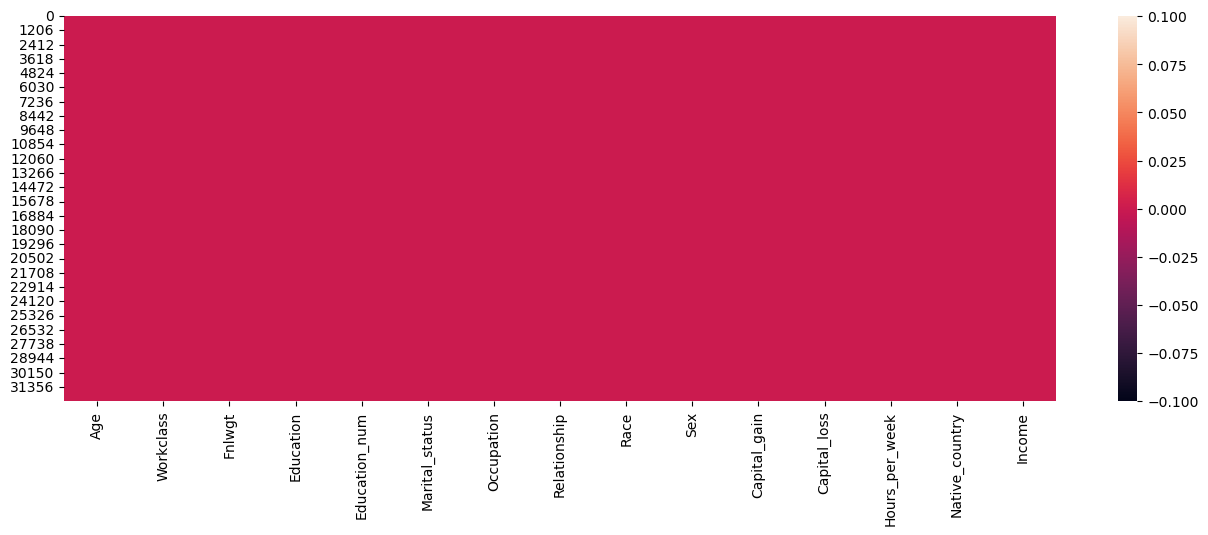

In [17]:
plt.figure(figsize = (16,5))
sns.heatmap(df.isnull())

There are no missing values in the dataset. We can analyse the statistical description of the dataset.

# Statistical Analysis of the dataset:

In [18]:
#To know more about the statistical description of the dataset
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Observation:

1] The count of the all the columns are equal there is no missing values.

2]The mean is greater than median repesents for distribution of the data is right skewed data.
[Capital_gain,Age,,Capital_loss]

3]The mean is lower than median represents  for distribution of the data is left skewed data.
[Fnlwgt,Education_num,_Hours per_week]

4]There is the difference between 75% and max it represents there is outliers in the data.


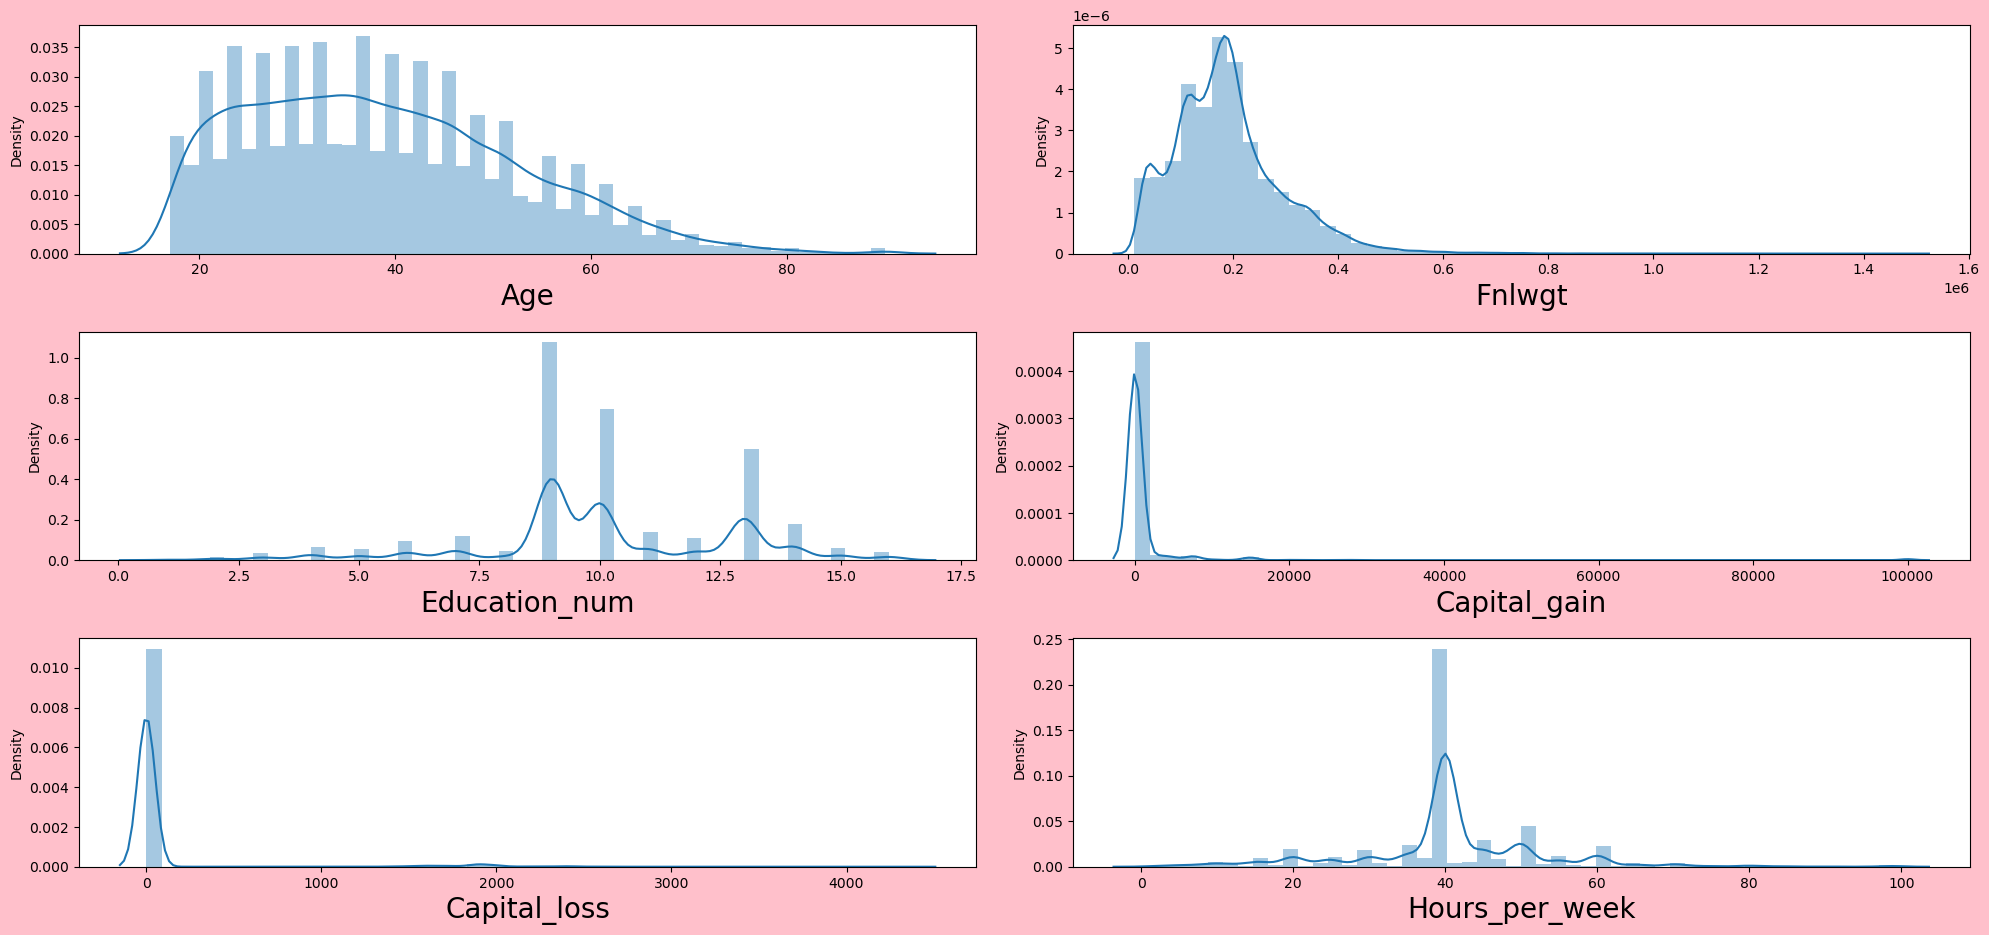

In [19]:
#To see the distribution among the columns:
plt.figure(figsize=(20,15),facecolor="pink")
plotnumber=1
for column in num_col:
    if plotnumber<=10:
        ax=plt.subplot(5,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

From the visualisation we can see that there is some what symmentric distribution in the captial loss,There are many slopes in the hours_peek_week_column.
Right skewed distribution of data in the capital gain. Many slopes in the education_num.

# Visualisation: Univariate and bivariate analysis

dependent feature-Income

In [20]:
#For the Work class column:
df['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay', ' Never-worked'],
      dtype=object)

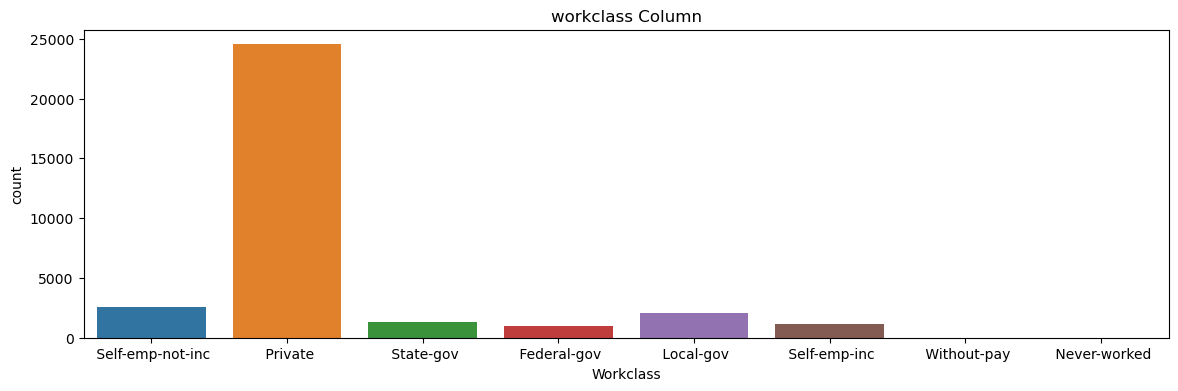

In [21]:
#Univariate analysis
plt.figure(figsize=(14,4))
sns.countplot(x="Workclass",data=df)
plt.title("workclass Column")
plt.show()

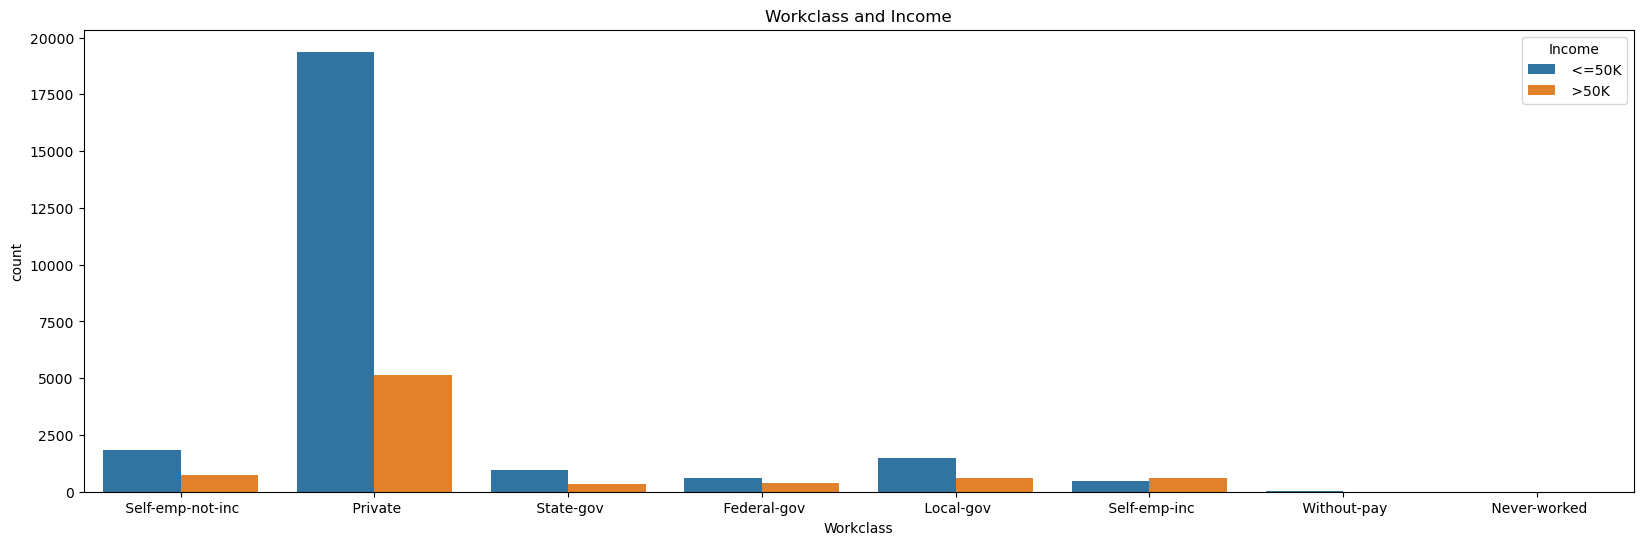

In [22]:
#BiVariate analysis.Workclass vs Income
plt.figure(figsize=(20,6))
sns.countplot(x="Workclass",hue="Income",data=df)
plt.title("Workclass and Income")
plt.show()

From this visual for the workclass column:
    Most of the data are received from Private sector,from this we can say that most of the salary income are below than that <=50K. 

In [23]:
#Analysing the column:
df['Education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

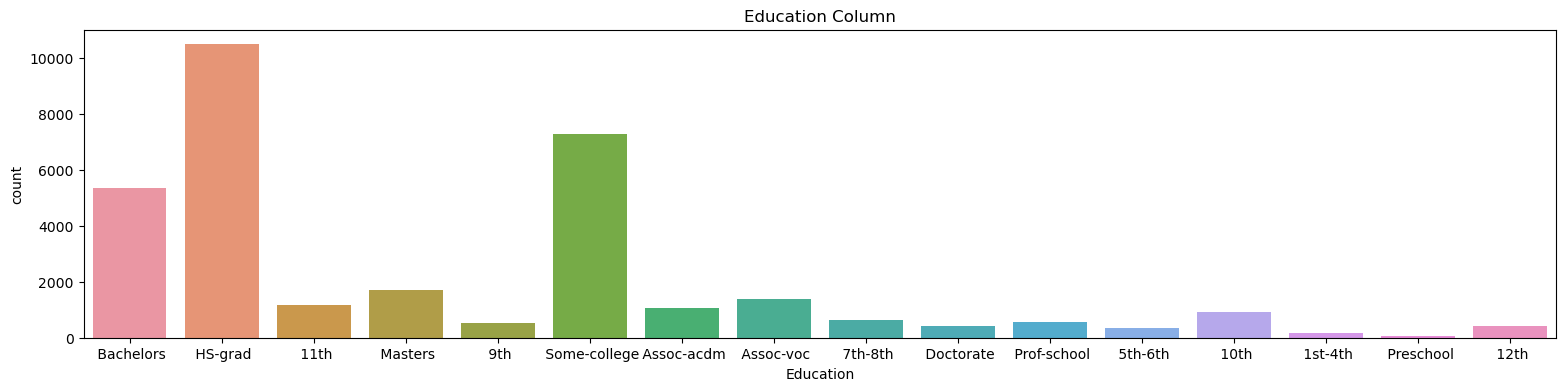

In [24]:
plt.figure(figsize=(19,4))
sns.countplot(x="Education",data=df)
plt.title("Education Column")
plt.show()

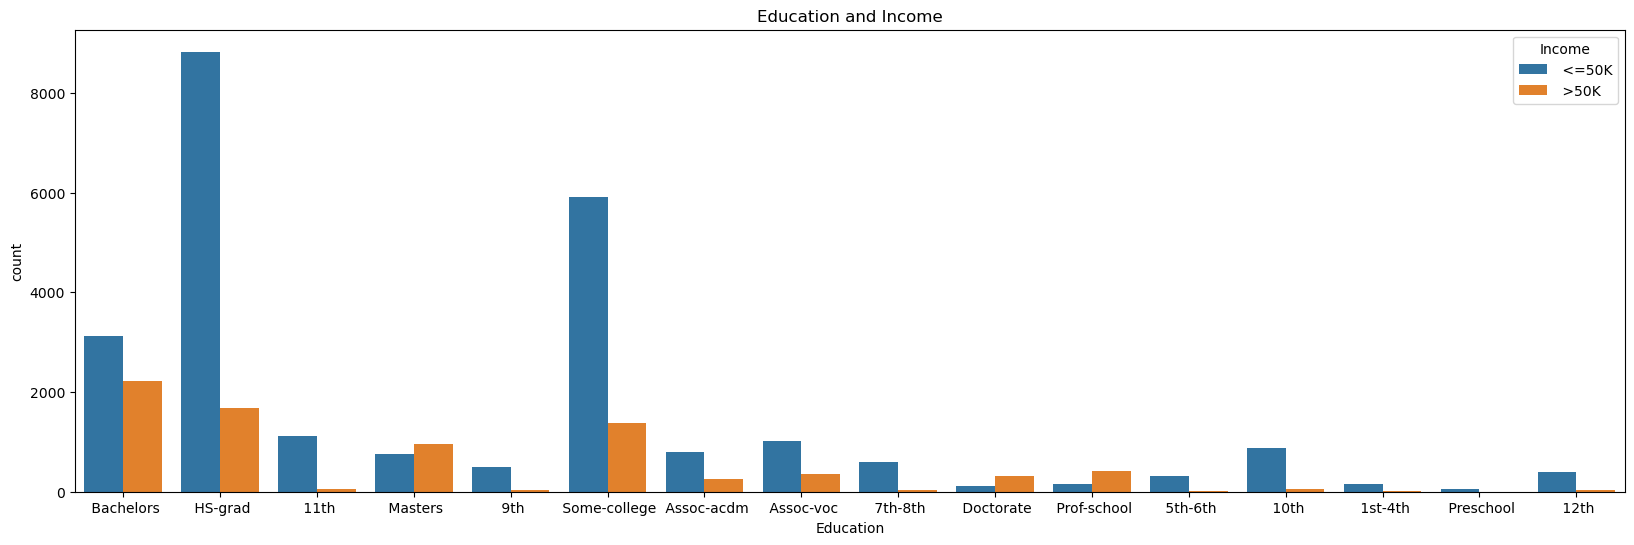

In [25]:
plt.figure(figsize=(20,6))
sns.countplot(x="Education",hue="Income",data=df)
plt.title("Education and Income")
plt.show()

HS-grad information are collected form which the we can say that bachelors and HS-grad are some what income greater than 50k and most of them comes below the 50k.

In [26]:
#Analysing the marital status:
df['Marital_status'].unique()

array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
      dtype=object)

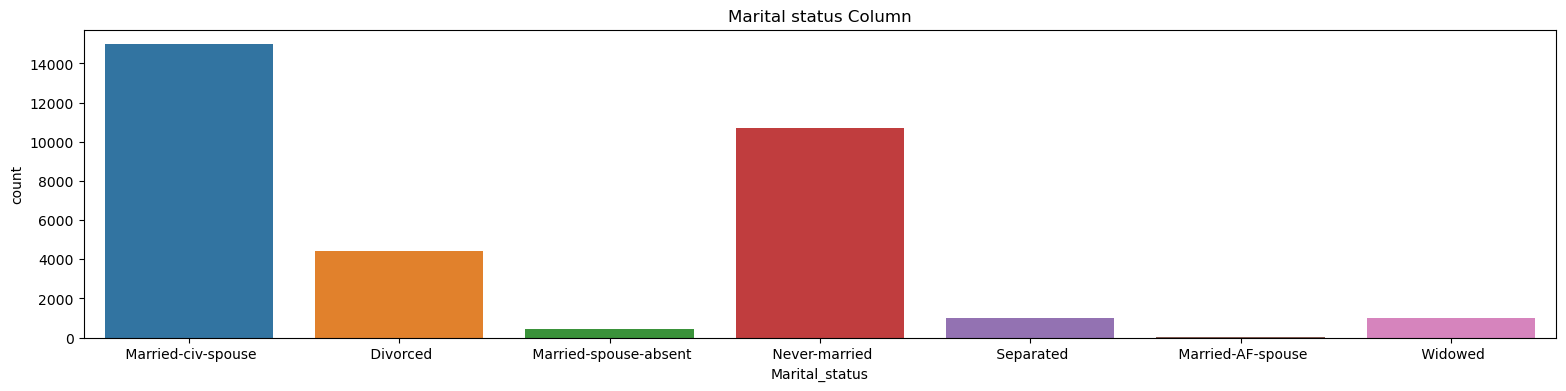

In [27]:
plt.figure(figsize=(19,4))
sns.countplot(x="Marital_status",data=df)
plt.title("Marital status Column")
plt.show()

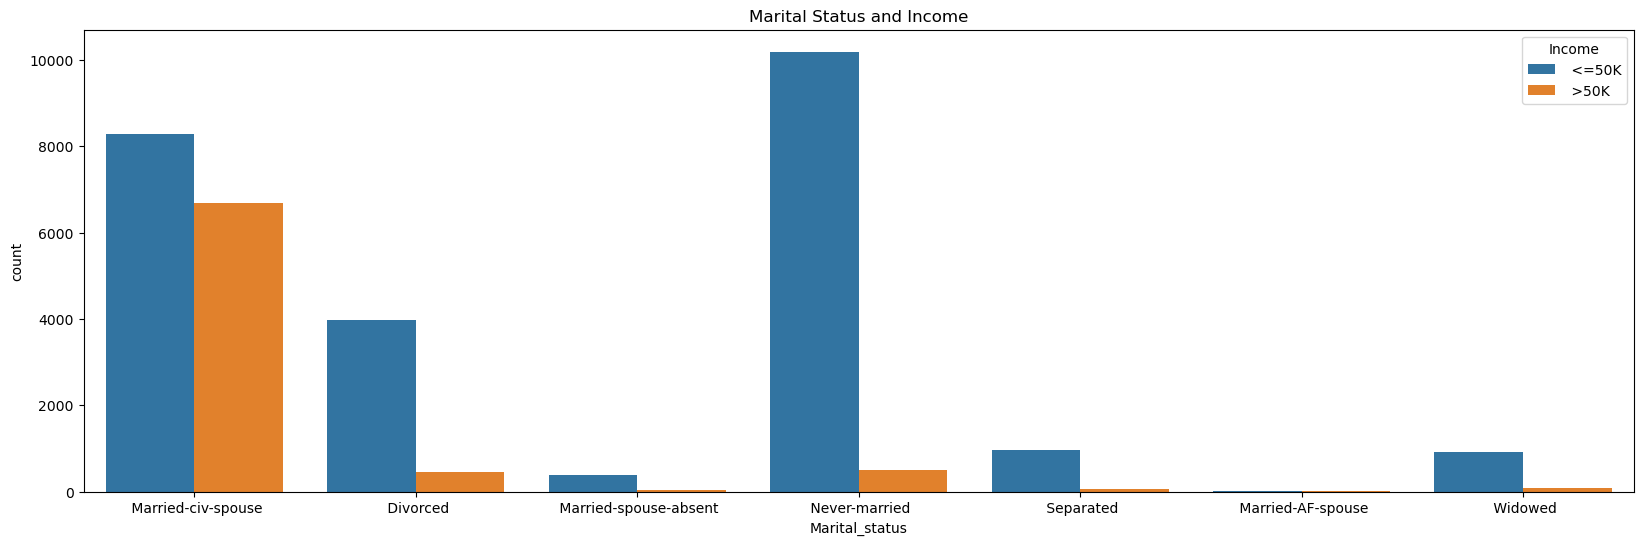

In [28]:
plt.figure(figsize=(20,6))
sns.countplot(x="Marital_status",hue="Income",data=df)
plt.title("Marital Status and Income")
plt.show()

Never-married Marital Stauts and Married-civ-spouse have the most of the people below 50k. Almost 70% of the maried cv spouse 
have above 50k.

In [29]:
#Analysing occpation column:
df['Occupation'].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

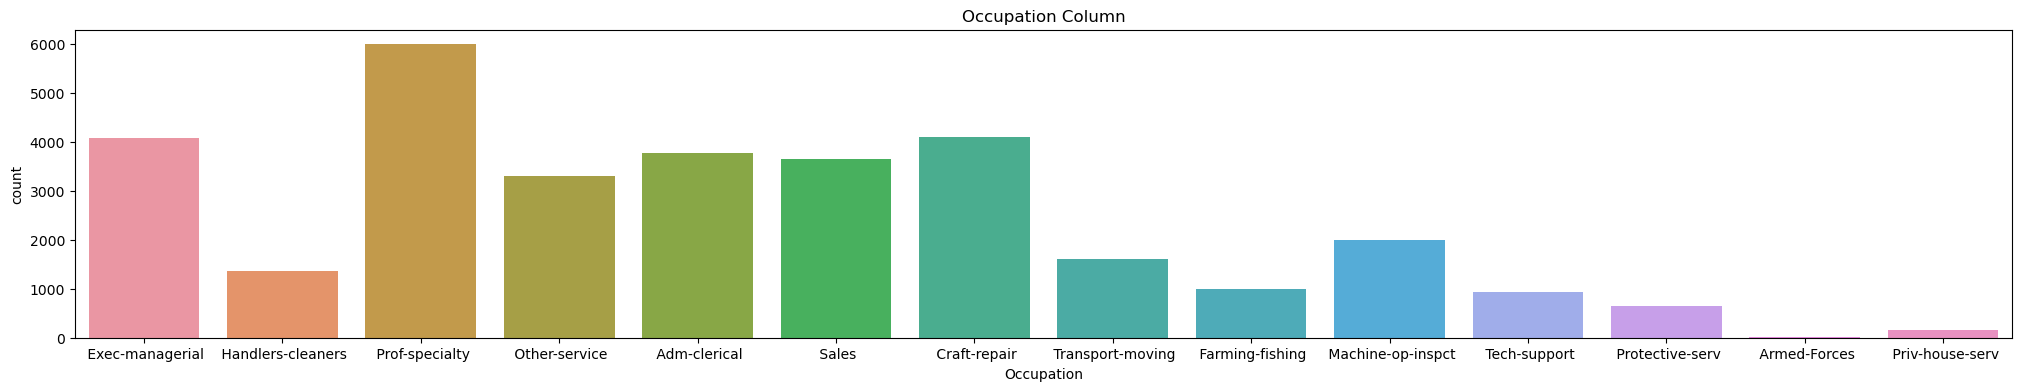

In [30]:
plt.figure(figsize=(25,4))
sns.countplot(x="Occupation",data=df)
plt.title("Occupation Column")
plt.show()

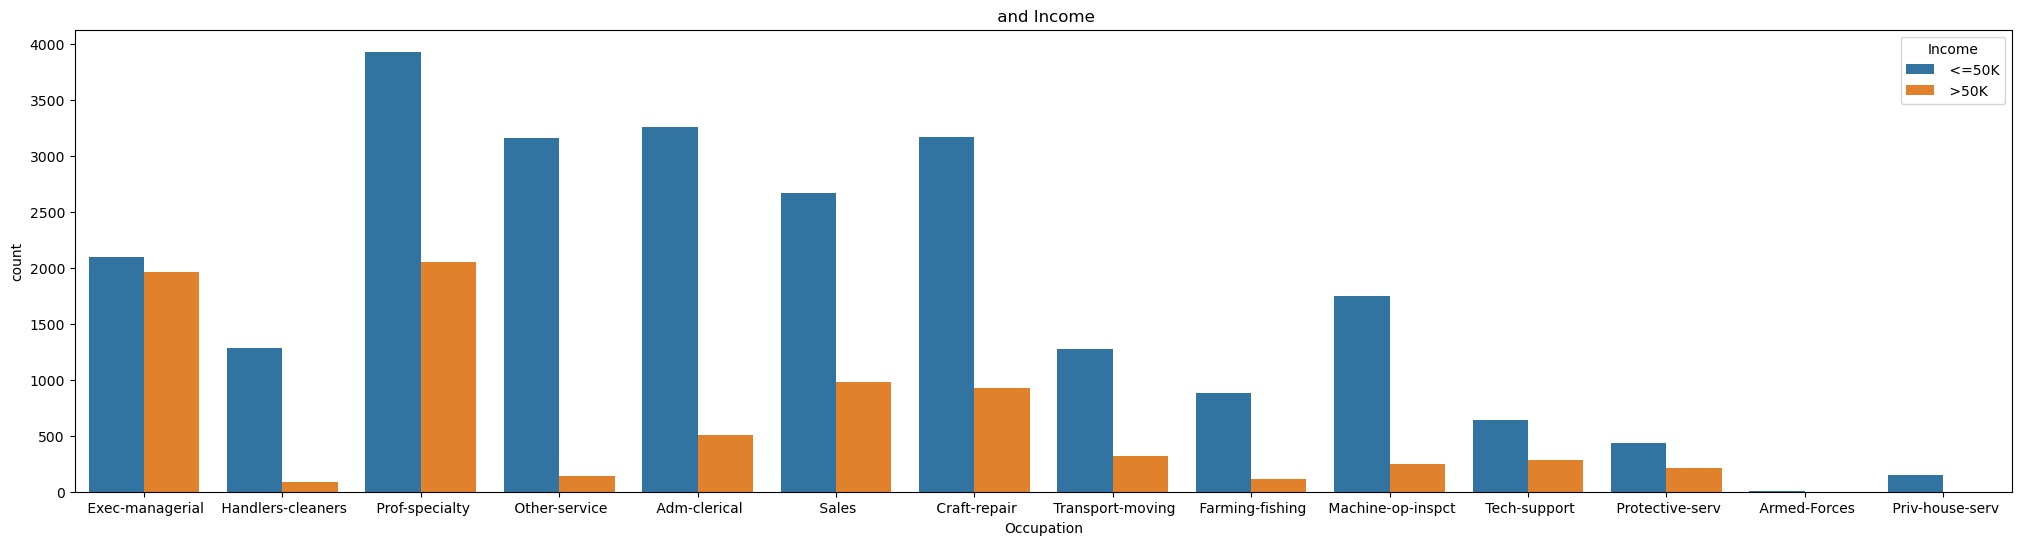

In [31]:
plt.figure(figsize=(25,6))
sns.countplot(x="Occupation",hue="Income",data=df)
plt.title(" and Income")
plt.show()

Exec Managerial and prof speciality have 70% more than 50k.Adm- clerical have less than 50k.

In [32]:
#Analysing the relationship:
df['Relationship'].unique()

array([' Husband', ' Not-in-family', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

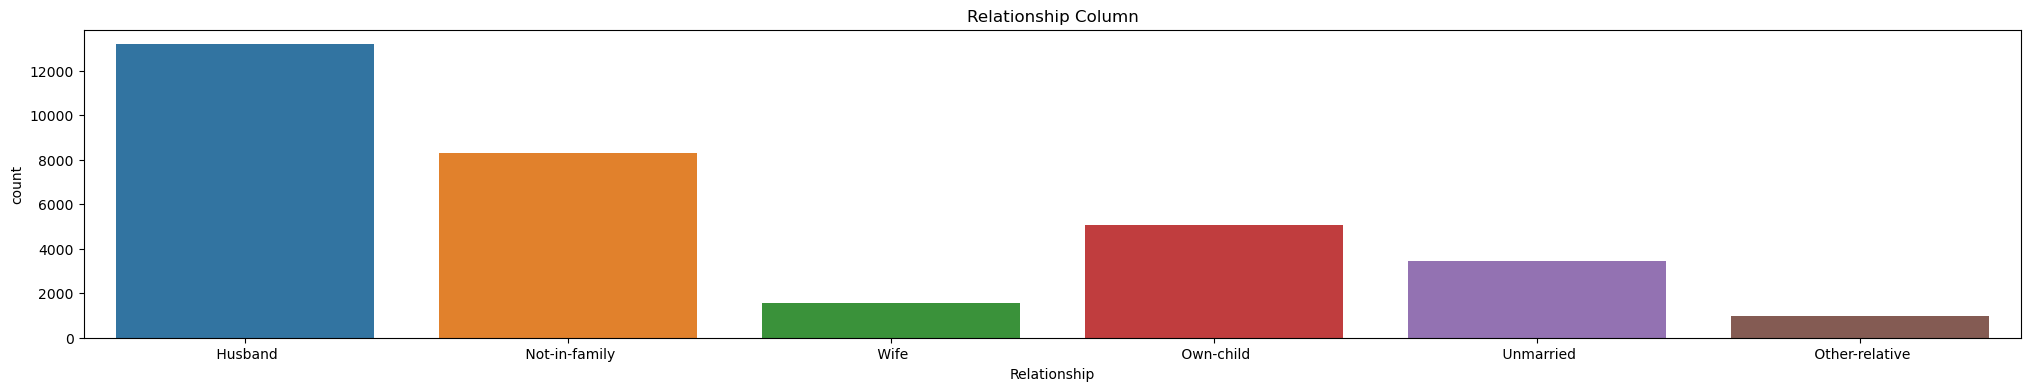

In [33]:
plt.figure(figsize=(25,4))
sns.countplot(x="Relationship",data=df)
plt.title("Relationship Column")
plt.show()

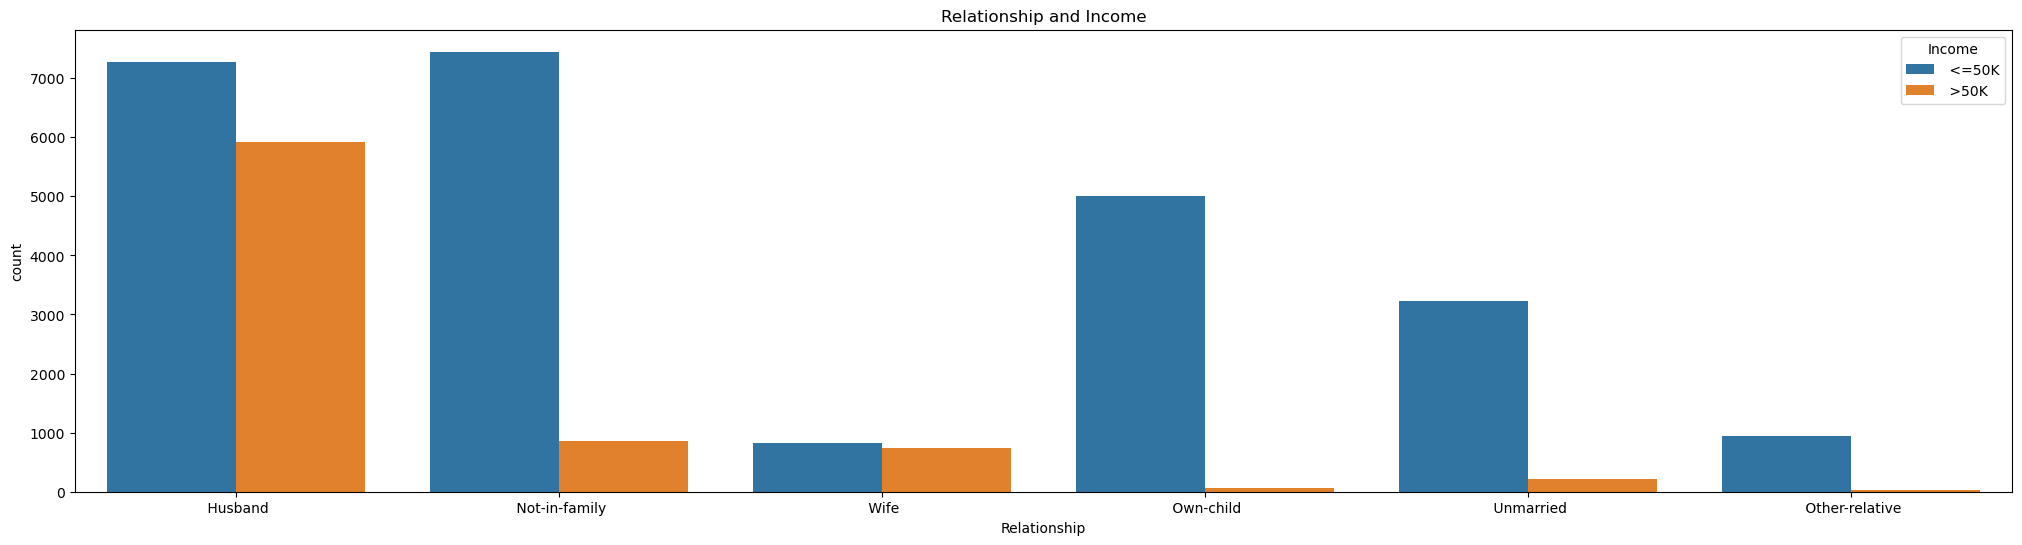

In [34]:
plt.figure(figsize=(25,6))
sns.countplot(x="Relationship",hue="Income",data=df)
plt.title("Relationship and Income")
plt.show()

Husband in the family got the income in which almost most of the husband have 50k more than income . Not in family people has income below than 50k.

In [35]:
#Analysing the race column:
df['Race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

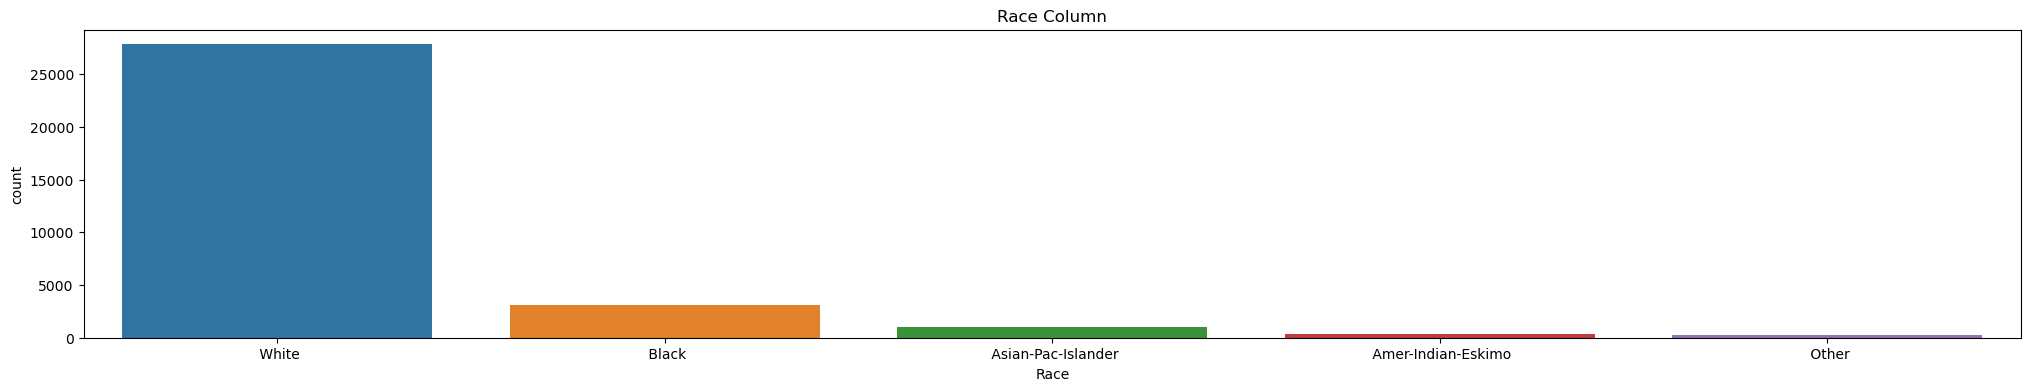

In [36]:
plt.figure(figsize=(25,4))
sns.countplot(x="Race",data=df)
plt.title("Race Column")
plt.show()

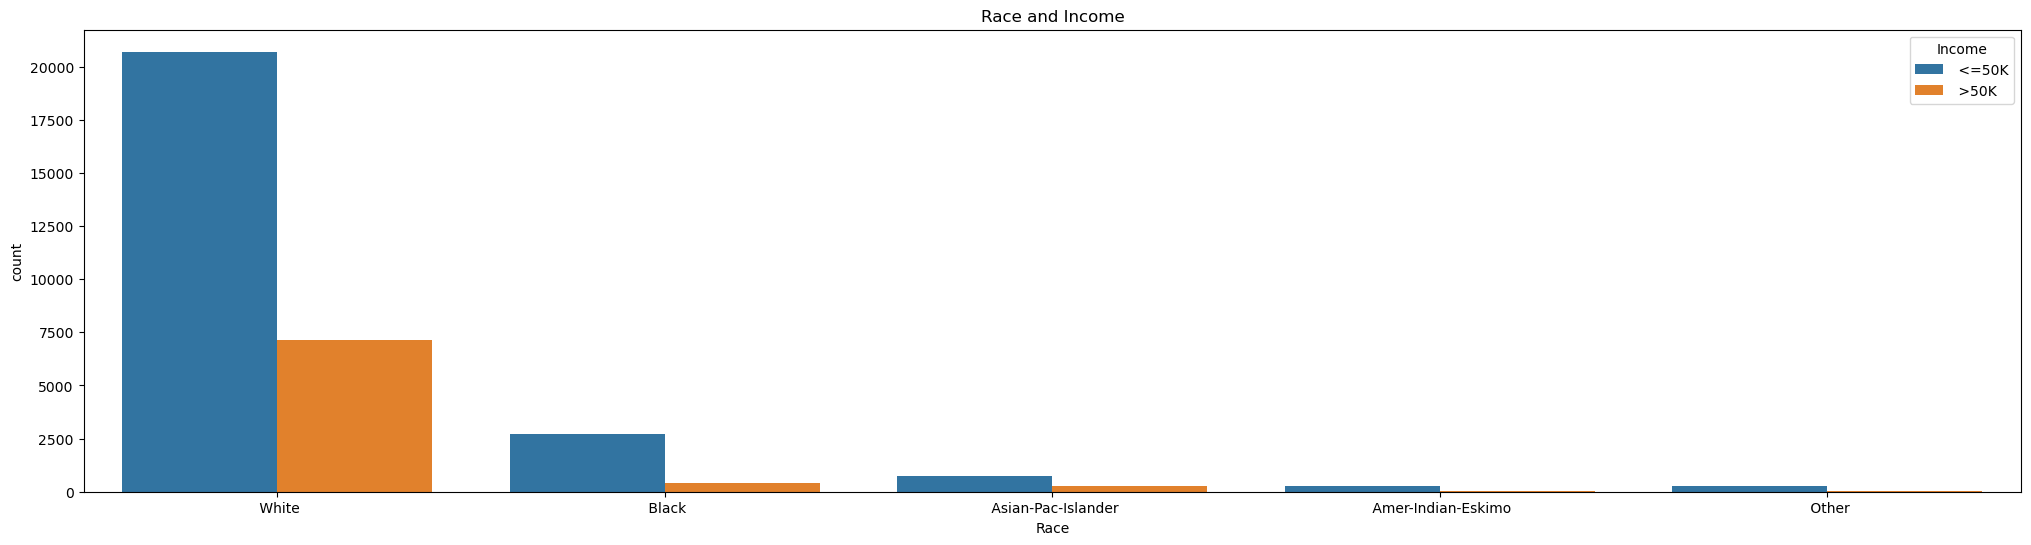

In [37]:
plt.figure(figsize=(25,6))
sns.countplot(x="Race",hue="Income",data=df)
plt.title("Race and Income")
plt.show()

White race people has the income less than 50k.

In [38]:
df['Sex'].unique()

array([' Male', ' Female'], dtype=object)

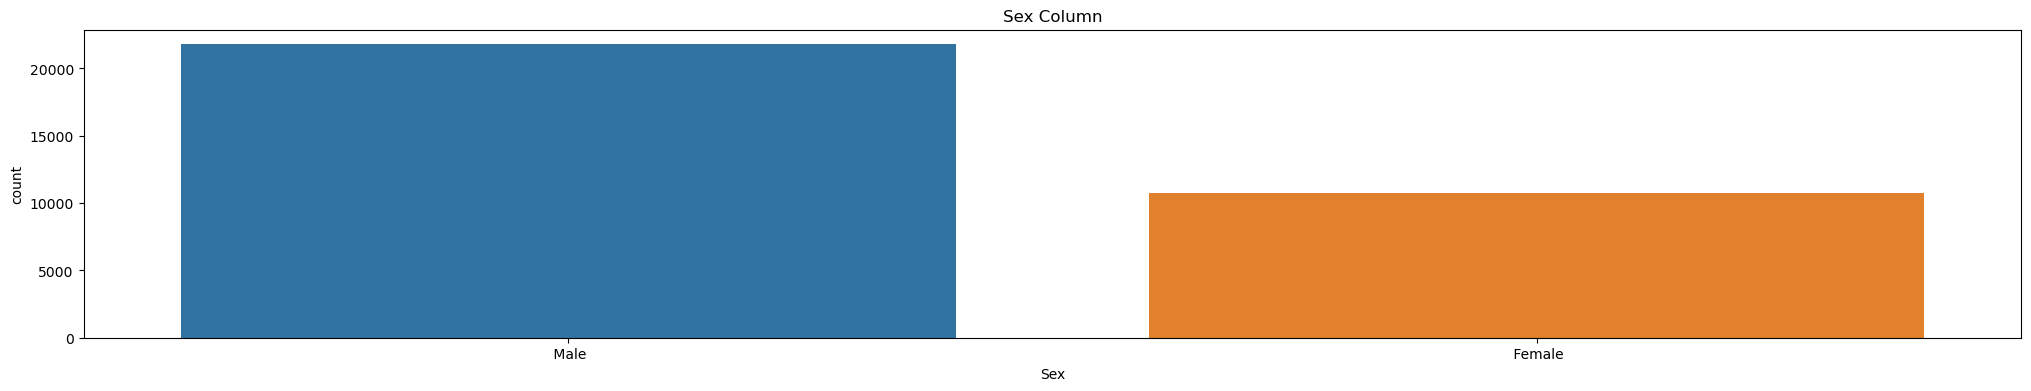

In [39]:
plt.figure(figsize=(25,4))
sns.countplot(x="Sex",data=df)
plt.title("Sex Column")
plt.show()

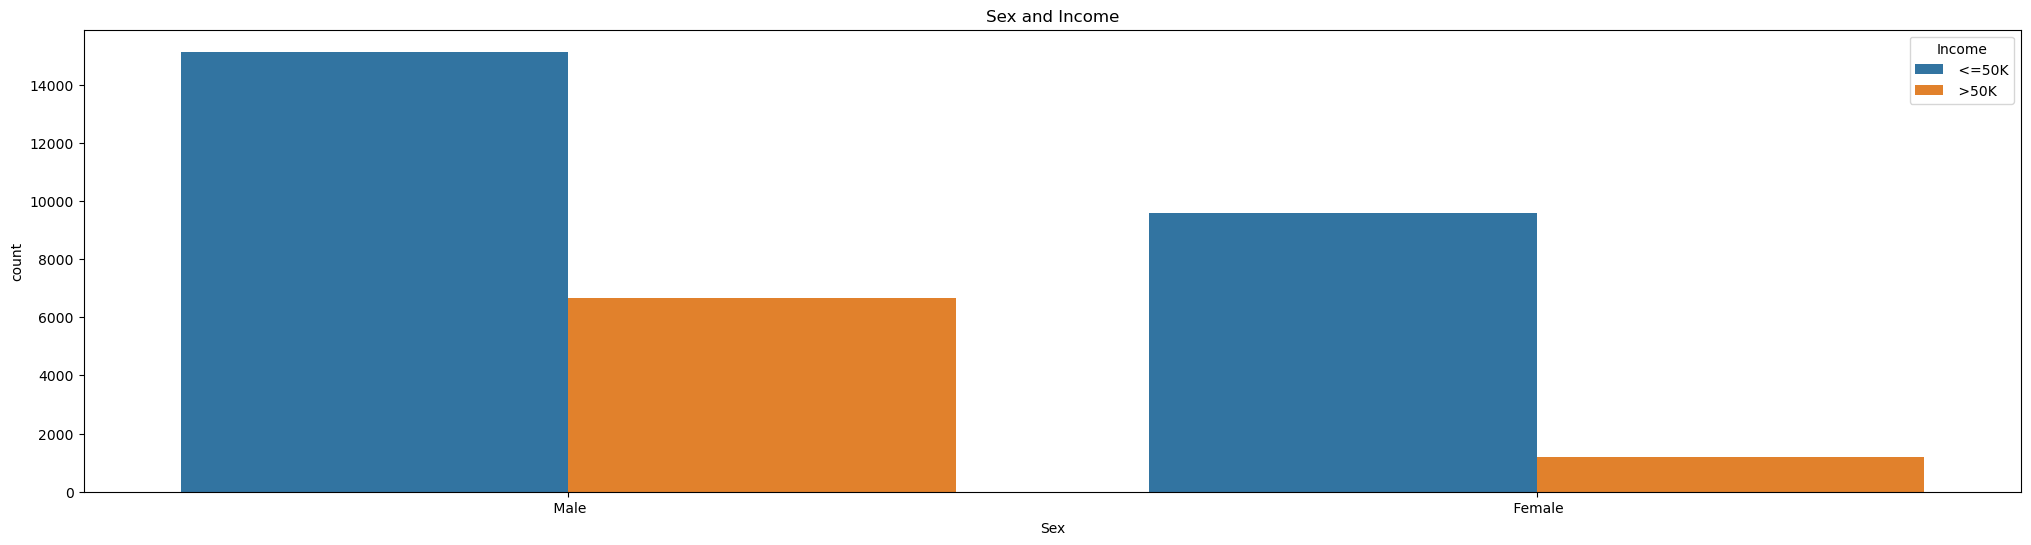

In [40]:
plt.figure(figsize=(25,6))
sns.countplot(x="Sex",hue="Income",data=df)
plt.title("Sex and Income")
plt.show()

Comparitive to males and females males has their income, in which they have 50k less than and 50k more than.

In [41]:
df['Native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

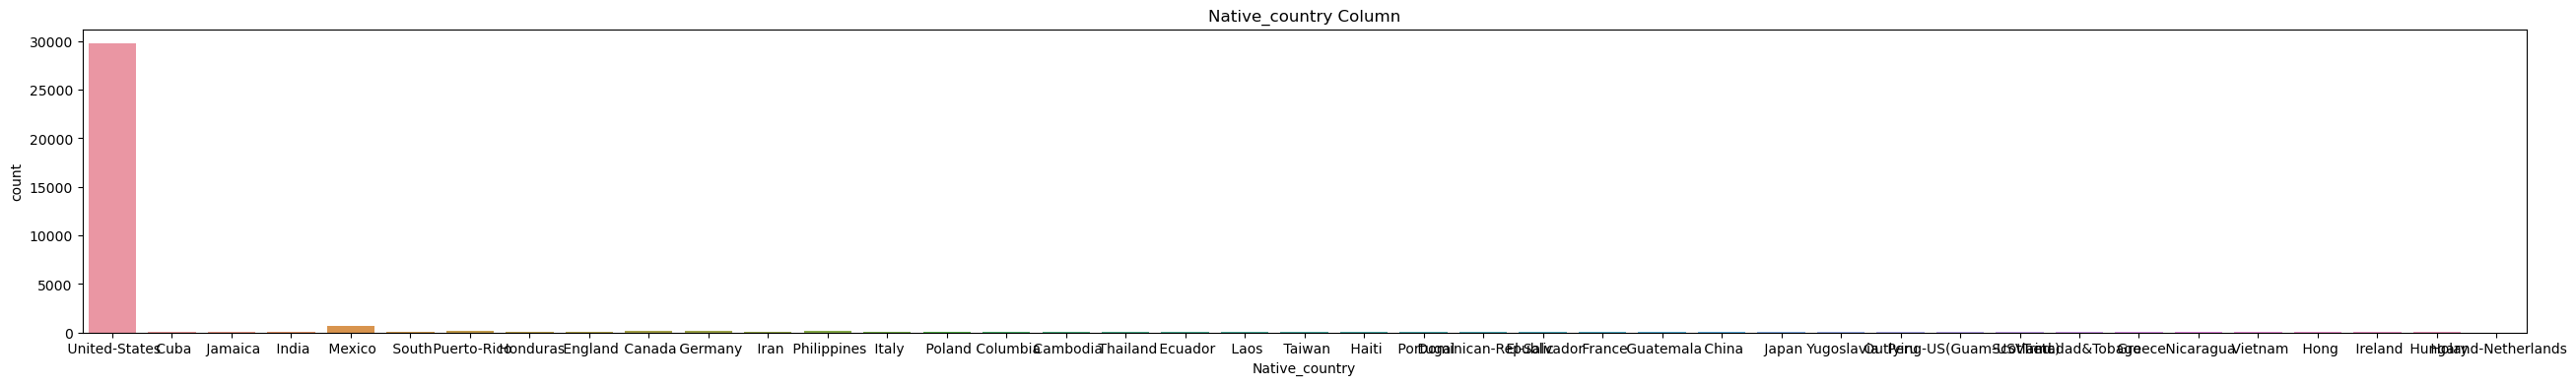

In [42]:
plt.figure(figsize=(32,4))
sns.countplot(x="Native_country",data=df)
plt.title("Native_country Column")
plt.show()

In [43]:
df['Native_country'].value_counts()

 United-States                 29752
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

Majority of the information are secured from usstates.

In [44]:
df["Income"].unique()

array([' <=50K', ' >50K'], dtype=object)

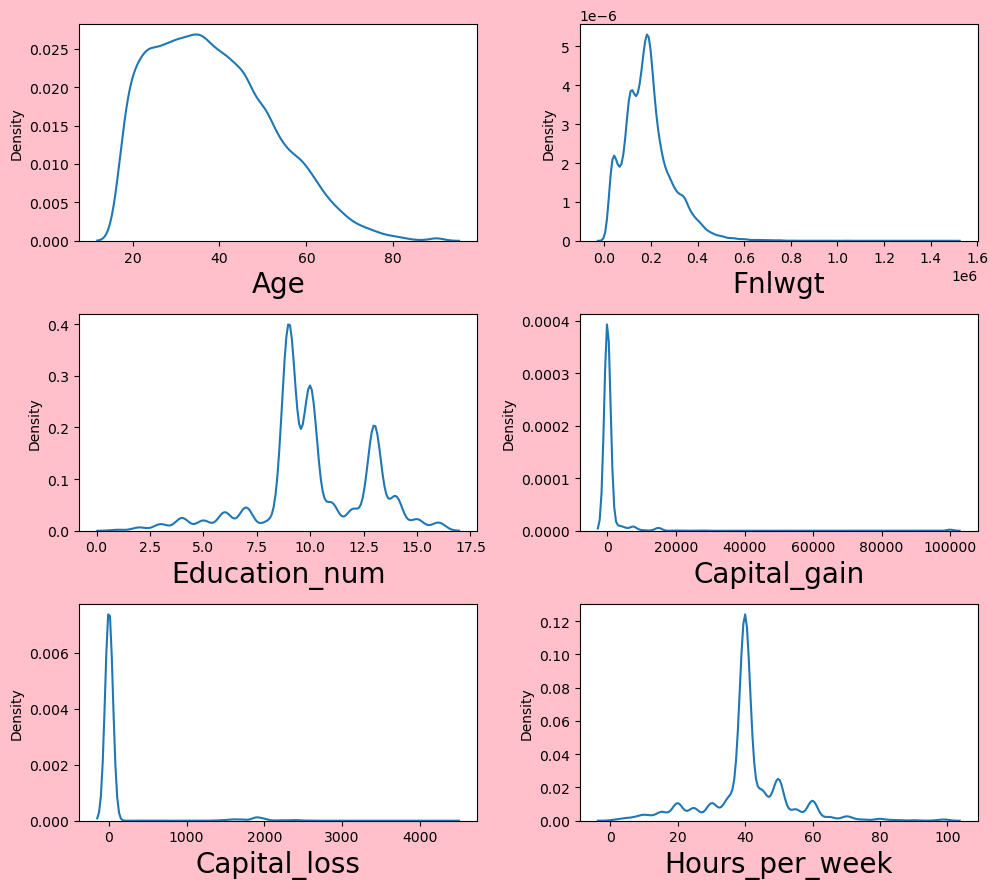

In [45]:
#To see the distribution among the numerical columns: kde plot 
plt.figure(figsize=(10,9),facecolor="pink")
plotnumber=1
for column in num_col:
    if plotnumber<=6:
        ax=plt.subplot(3,2,plotnumber)
        sns.kdeplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

from this kde plot we can see the distribution of data in the dataset. Age column has righ skewed distribution of data.Education column has major three high points. capital loss may have symmentric distribution of data but the standard deviation is narrowed.The hoursperweek column has many minor peaks with one major peak in the distribution.

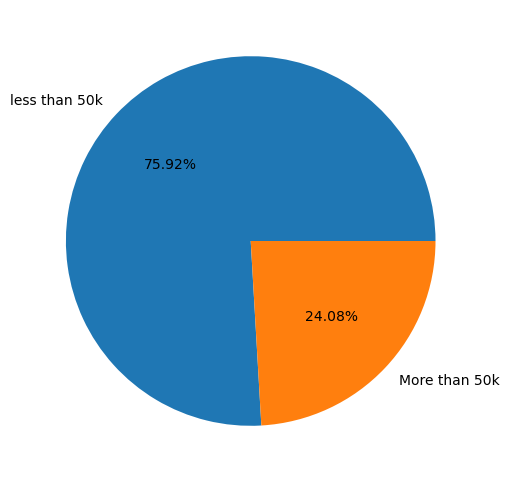

In [46]:
plt.figure(figsize=(10,6))
plt.pie(df['Income'].value_counts()*100/len(df),labels=['less than 50k', 'More than 50k'],autopct='%.2f%%')
plt.show()

From this piechart,We can say that 75.92% comes under the category less than 50k and 24.08% of persons alone come under more than 50k.

# Encoding:

Converting text values into numerical values.

['Workclass', 'Education', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native_country', 'Income'] These are the columns which has object dataype.

Converting the dependent feature Income if less than 50k=0 ,More than 50k=1.

In [47]:
df["Income"].unique()

array([' <=50K', ' >50K'], dtype=object)

In [48]:
#Replacing the Income column:
df.replace({
    "Income":{' <=50K':0,' >50K':1}},inplace=True)

Converting all the independent features with the help of label encoding.

In [49]:
#Converting the property_Area column with label Encoder:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Education']=le.fit_transform(df['Education'])
df['Marital_status']=le.fit_transform(df['Marital_status'])
df['Occupation']=le.fit_transform(df['Occupation'])
df['Relationship']=le.fit_transform(df['Relationship'])
df['Race']=le.fit_transform(df['Race'])
df['Native_country']=le.fit_transform(df['Native_country'])
df['Workclass']=le.fit_transform(df['Workclass'])
df['Sex']=le.fit_transform(df['Sex'])

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             32560 non-null  int64
 1   Workclass       32560 non-null  int32
 2   Fnlwgt          32560 non-null  int64
 3   Education       32560 non-null  int32
 4   Education_num   32560 non-null  int64
 5   Marital_status  32560 non-null  int32
 6   Occupation      32560 non-null  int32
 7   Relationship    32560 non-null  int32
 8   Race            32560 non-null  int32
 9   Sex             32560 non-null  int32
 10  Capital_gain    32560 non-null  int64
 11  Capital_loss    32560 non-null  int64
 12  Hours_per_week  32560 non-null  int64
 13  Native_country  32560 non-null  int32
 14  Income          32560 non-null  int64
dtypes: int32(8), int64(7)
memory usage: 2.7 MB


Now all the dtypes of the columns are in numerical format.

# Corelation:

In [51]:
df.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.040506,-0.076646,-0.010508,0.036527,-0.266292,0.001740,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.000271,0.234039
Workclass,0.040506,1.000000,-0.024255,0.004901,0.003445,-0.020545,0.007236,-0.057931,0.048323,0.071535,0.031496,0.002662,0.042206,-0.001646,0.002739
Fnlwgt,-0.076646,-0.024255,1.000000,-0.028156,-0.043159,0.028184,0.000138,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.063279,-0.009481
Education,-0.010508,0.004901,-0.028156,1.000000,0.359172,-0.038398,-0.041297,-0.010879,0.014135,-0.027349,0.030047,0.016744,0.055510,0.076062,0.079311
Education_num,0.036527,0.003445,-0.043159,0.359172,1.000000,-0.069338,0.071012,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.088887,0.335182
Marital_status,-0.266292,-0.020545,0.028184,-0.038398,-0.069338,1.000000,0.035008,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.021285,-0.199295
Occupation,0.001740,0.007236,0.000138,-0.041297,0.071012,0.035008,1.000000,-0.037465,-0.004821,0.047497,0.018028,0.009670,-0.012881,-0.002205,0.034599
Relationship,-0.263698,-0.057931,0.008922,-0.010879,-0.094145,0.185461,-0.037465,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.010710,-0.250924
Race,0.028718,0.048323,-0.021278,0.014135,0.031825,-0.068025,-0.004821,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.116526,0.071853
Sex,0.088832,0.071535,0.026882,-0.027349,0.012256,-0.129337,0.047497,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,0.002055,0.215995


<Axes: >

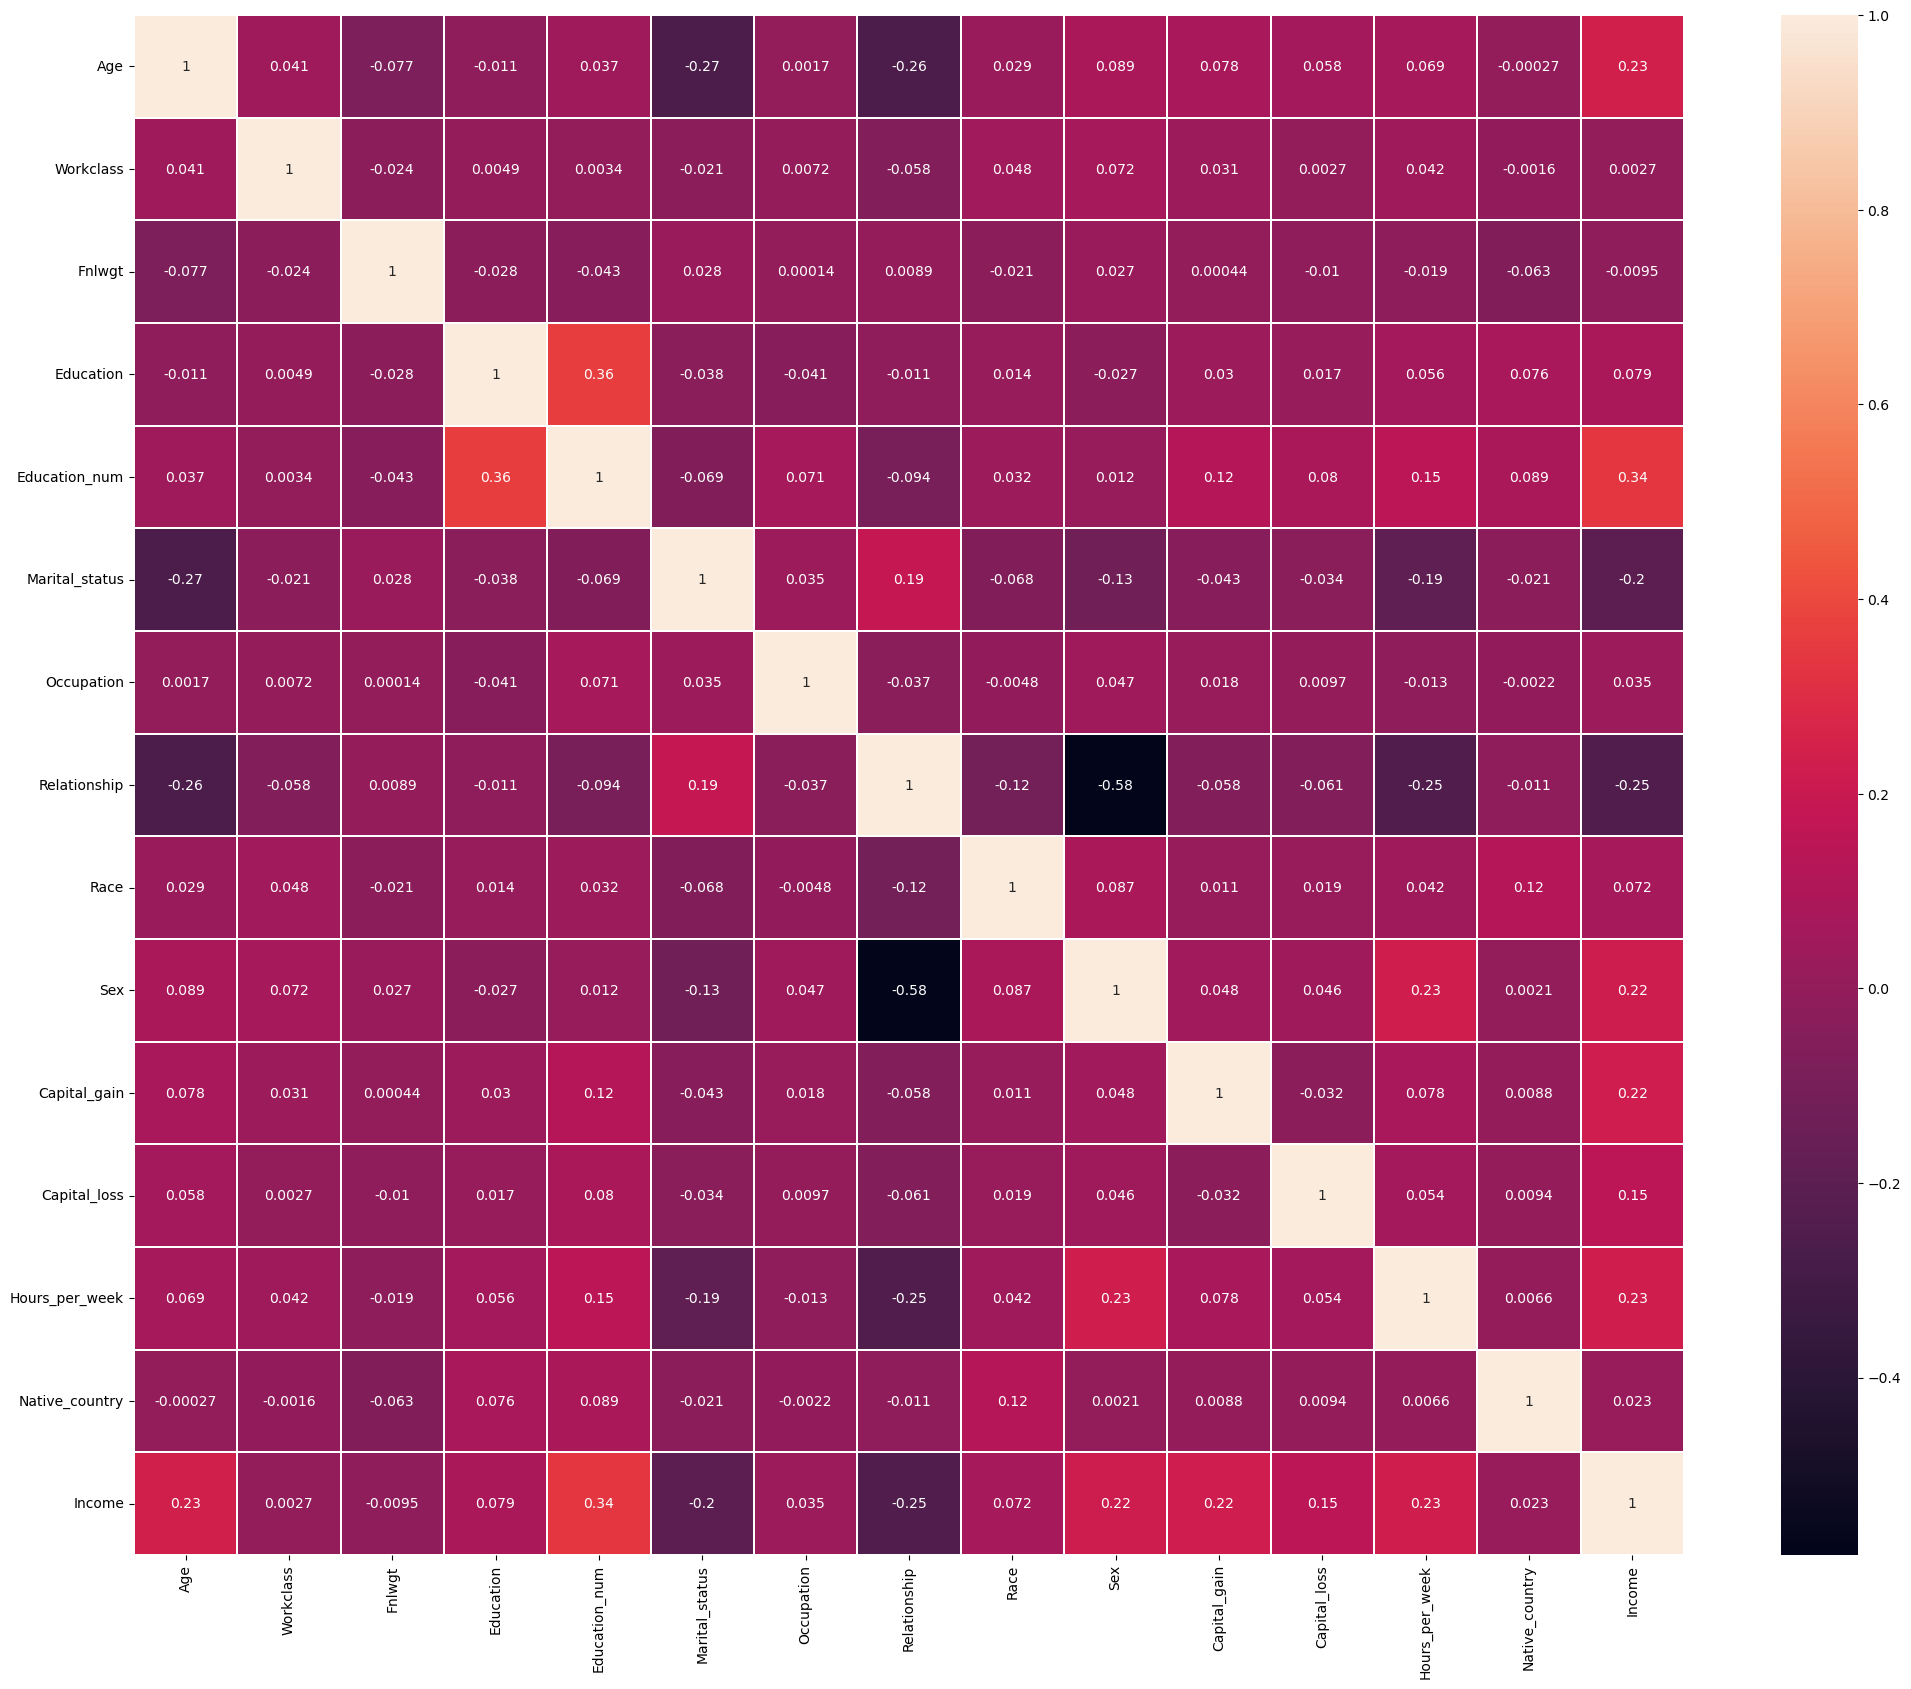

In [52]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(),annot=True,linewidths=.25)

For the dependent feature Income column we can see the corelation among the other columns:

Postive Corelation:Age(23%),Education_num(34%),Sex(22%),Captain Gain(22%),Hours_per_week(23%),Capital loss(15%)

Negative Corelation:Relationship(25%),Marital Status(20%)

zero Corelation :Workclass,Education,Native country

Multi-Collinearity between the columns:

Relationship and sex column has multicolinearity in the negative side upto 58%.
Other than this all other columns has less than 25% of muliticolinearity.

# Skewness handling

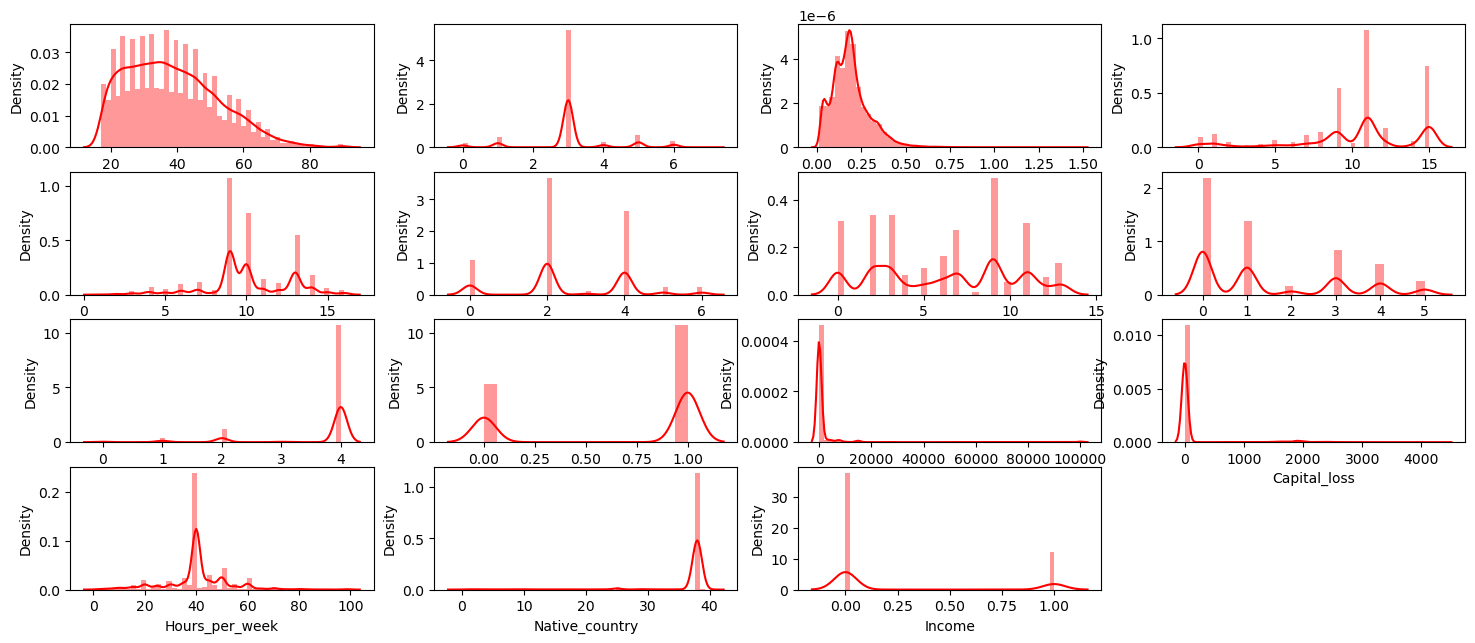

In [53]:
plt.figure(figsize=(18,15))
for i in enumerate(df.columns):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df[i[1]],color='r')

In [54]:
Y=df[["Income"]]
df.drop("Income",axis=1,inplace=True)

In [55]:
df.skew()

Age                0.558738
Workclass          0.076178
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.000536
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -4.243083
dtype: float64

skewness more than+/- 0.5 will we treated

In [56]:
#Removing skewness of the data
from sklearn.preprocessing import PowerTransformer
PT=PowerTransformer()
for i in df.columns:
    if abs(df.loc[:,i].skew())>0.5:
        df.loc[:,i]=PT.fit_transform(df.loc[:,i].values.reshape(-1,1))

In [57]:
df.skew()

Age              -0.013897
Workclass         0.076178
Fnlwgt            0.016914
Education        -0.309431
Education_num    -0.311630
Marital_status   -0.013448
Occupation        0.000536
Relationship      0.122917
Race             -2.010817
Sex              -0.719244
Capital_gain      3.016951
Capital_loss      4.299511
Hours_per_week    0.227636
Native_country   -2.981838
dtype: float64

# Outliers

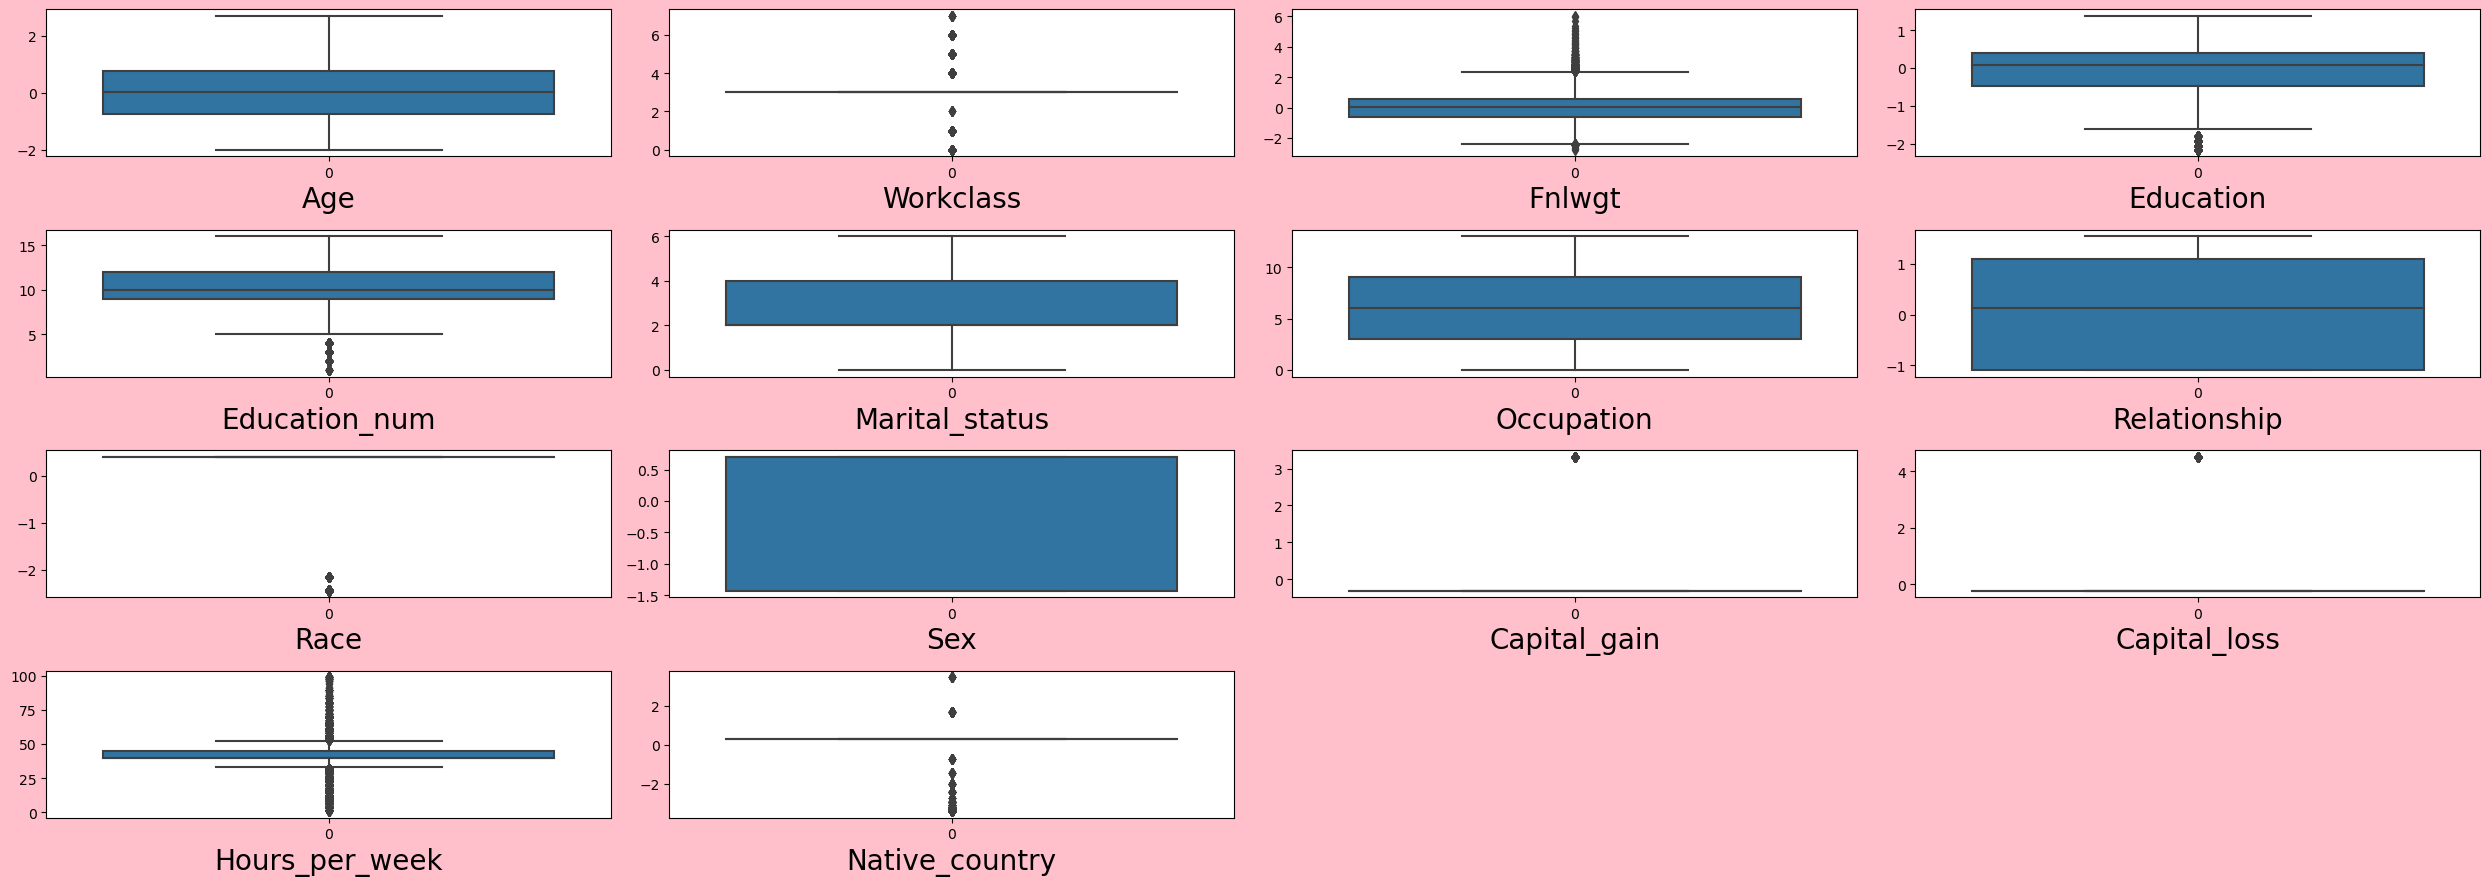

In [58]:
#To see the outliers among the columns:
plt.figure(figsize=(25,15),facecolor="pink")
plotnumber=1
for column in df:
    if plotnumber<=28:
        ax=plt.subplot(7,4,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

# outliers removal

# zscore

In [59]:
from scipy.stats import zscore
z=np.abs(zscore(df))
print(np.where(z>3))

(array([    3,     5,     7, ..., 32546, 32547, 32559], dtype=int64), array([13, 13, 10, ..., 13, 10, 10], dtype=int64))


In [60]:
z_scoredf=df[(z<3).all(axis=1)]
print("with outliers::",df.shape)
print("After removing outliers::",z_scoredf.shape)

with outliers:: (32560, 14)
After removing outliers:: (25604, 14)


# IQR

In [61]:
from scipy import stats 
IQR = stats.iqr(df) 
IQR

3.221213198401304

In [62]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQRdf= df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(IQRdf.shape)

(18489, 14)


Choosing the zscore for the outlier removal becoz of the less dataloss.

# Checking for the Imbalanced dataset in dependent feature:

In [63]:
Y.value_counts()

Income
0         24719
1          7841
dtype: int64

There is imbalanced dataset in dependent feature.

In [64]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()

# Splitting The Dataset Into Feature and Target:

In [65]:
#Importing the neccessary libraries and model for further creation of the model:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
from sklearn.model_selection import cross_val_score

In [66]:
X=df

In [67]:
X,Y=sm.fit_resample(X,Y)

In [68]:
X.shape , Y.shape

((49438, 14), (49438, 1))

Now the dataset looks balanced.

# Standardisation:

In [69]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [70]:
x_scaled=scaler.fit_transform(X)

In [71]:
# best Random_state
maxaccu=0
maxRS=0

for i in range(0,200):
    x_train,x_test,y_train,y_test= train_test_split(x_scaled,Y,random_state=i,test_size=.20)
    LR= LogisticRegression()
    LR.fit(x_train,y_train)
    pred= LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxRS=i
print("Best accuracy is ",maxaccu,"on Random State =",maxRS)

Best accuracy is  0.791970064724919 on Random State = 120


In [72]:
x_scaled.shape,Y.shape

((49438, 14), (49438, 1))

# Model selection:

In [73]:
LR_model= LogisticRegression()
RD_model= RidgeClassifier()
DT_model= DecisionTreeClassifier()
SV_model= SVC()
KNR_model= KNeighborsClassifier()
RFC_model= RandomForestClassifier()
SGH_model= SGDClassifier()
Bag_model=BaggingClassifier()
ADA_model=AdaBoostClassifier()
GB_model= GradientBoostingClassifier()

model=[LR_model,RD_model,DT_model,SV_model,KNR_model,RFC_model,SGH_model,Bag_model,ADA_model,GB_model ]

In [74]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    pred= m.predict(x_test)
    print('Accuracy_Score of ',m, 'is', accuracy_score(y_test,pred)*100)
    print('Confusion Matrix of ',m,' is \n', confusion_matrix(y_test,pred) )
    print(classification_report(y_test,pred))
    print('*'*50)

Accuracy_Score of  LogisticRegression() is 78.39805825242718
Confusion Matrix of  LogisticRegression()  is 
 [[3790 1177]
 [ 959 3962]]
              precision    recall  f1-score   support

           0       0.80      0.76      0.78      4967
           1       0.77      0.81      0.79      4921

    accuracy                           0.78      9888
   macro avg       0.78      0.78      0.78      9888
weighted avg       0.78      0.78      0.78      9888

**************************************************
Accuracy_Score of  RidgeClassifier() is 78.23624595469255
Confusion Matrix of  RidgeClassifier()  is 
 [[3702 1265]
 [ 887 4034]]
              precision    recall  f1-score   support

           0       0.81      0.75      0.77      4967
           1       0.76      0.82      0.79      4921

    accuracy                           0.78      9888
   macro avg       0.78      0.78      0.78      9888
weighted avg       0.78      0.78      0.78      9888

*****************************

# Cross Validation:

In [75]:
for i in model:
    print('Accuracy_Score of ',i, 'is', accuracy_score(y_test,i.predict(x_test))*100)
    print("cross Validation accuracy score of ",i ," is ",cross_val_score(i,X,Y,cv=5, scoring='accuracy').mean()*100)
    print('*'*50)

Accuracy_Score of  LogisticRegression() is 78.39805825242718
cross Validation accuracy score of  LogisticRegression()  is  78.22122079007346
**************************************************
Accuracy_Score of  RidgeClassifier() is 78.23624595469255
cross Validation accuracy score of  RidgeClassifier()  is  78.2272858871592
**************************************************
Accuracy_Score of  DecisionTreeClassifier() is 84.52669902912622
cross Validation accuracy score of  DecisionTreeClassifier()  is  84.10144523896732
**************************************************
Accuracy_Score of  SVC() is 83.24231391585761
cross Validation accuracy score of  SVC()  is  78.74308795374789
**************************************************
Accuracy_Score of  KNeighborsClassifier() is 84.86043689320388
cross Validation accuracy score of  KNeighborsClassifier()  is  84.89626754821391
**************************************************
Accuracy_Score of  RandomForestClassifier() is 89.32038834951457


# Top model 1:RandomForestClassifier

Accuracy_Score of  RandomForestClassifier() is 89.32038834951457

cross Validation accuracy score of  RandomForestClassifier()  is  89.21488160059809

# Top Model 2:BaggingClassifier

Accuracy_Score of  BaggingClassifier() is 87.91464401294499

cross Validation accuracy score of  BaggingClassifier()  is  87.28321497321024

# Hyperparameter Tuning:

In [76]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

In [77]:
topmodel1 = RandomForestClassifier()

In [78]:
param_grid = { 
    'n_estimators': [25, 50, 100, 150], 
    'max_features': ['sqrt', 'log2'], 
    'max_depth': [3, 6, 9], 
    'max_leaf_nodes': [3, 6, 9], 
} 

In [80]:
grid_search = GridSearchCV(RandomForestClassifier(), 
                           param_grid=param_grid) 
grid_search.fit(x_train, y_train) 
print(grid_search.best_estimator_) 

RandomForestClassifier(max_depth=9, max_leaf_nodes=9, n_estimators=150)


In [83]:
model_grid = RandomForestClassifier(max_depth=9, 
                                    max_features="log2", 
                                    max_leaf_nodes=9, 
                                    n_estimators=150) 
model_grid.fit(x_train, y_train) 
y_pred_grid = model_grid.predict(x_test) 
print(classification_report(y_pred_grid, y_test))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82      4465
           1       0.88      0.79      0.83      5423

    accuracy                           0.83      9888
   macro avg       0.83      0.83      0.82      9888
weighted avg       0.83      0.83      0.83      9888



# Confusion Matrix:

In [84]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[4157,  810],
       [ 574, 4347]], dtype=int64)

<Axes: >

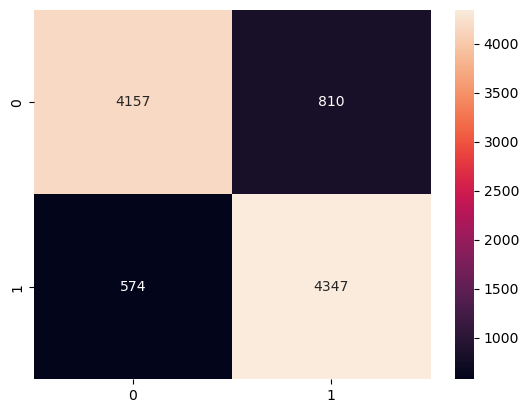

In [85]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True, fmt='d')

In [86]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      4967
           1       0.84      0.88      0.86      4921

    accuracy                           0.86      9888
   macro avg       0.86      0.86      0.86      9888
weighted avg       0.86      0.86      0.86      9888



In [87]:
from sklearn.metrics import RocCurveDisplay

# ROCCURVE:

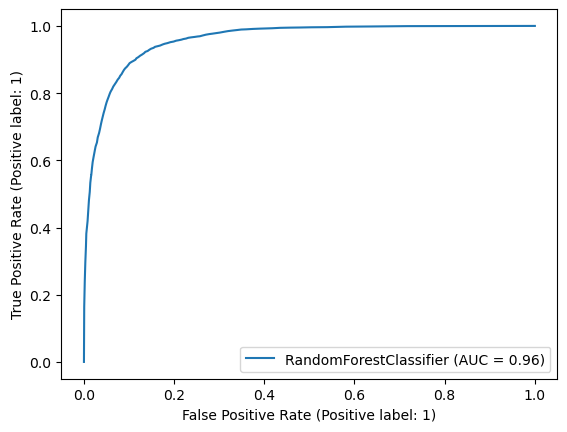

In [88]:
RocCurveDisplay.from_estimator(RFC_model, x_test, y_test)


# Saving the Model

In [89]:
import joblib
joblib.dump(RFC_model,"Census Income.pkl")

['Census Income.pkl']

In [ ]:
#End of the project